<a href="https://colab.research.google.com/github/shubhangilore/fds/blob/main/FDS%20JOURNAL%2017.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%cd ..
from google.colab import drive
drive.mount('/content/gdrive')


/
Mounted at /content/gdrive


In [ ]:
from pathlib import Path

import pandas as pd
import numpy as np
from scipy.stats import trim_mean
from statsmodels import robust


import seaborn as sns
import matplotlib.pylab as plt

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [42]:
gdata=pd.read_csv("/content/drive/MyDrive/datasets.zip (Unzipped Files)/datasets/gradedata2.csv")

In [43]:
gdata.head()

,fname,lname,gender,age,exercise,hours,grade,address
0,Marcia,Pugh,female,17,3,10,82.4,"7379 Highland Rd. , Dublin, GA 31021"
1,Kadeem,Morrison,male,18,4,4,78.2,"8 Bayport St. , Honolulu, HI 96815"
2,Nash,Powell,male,18,5,9,79.3,"Encino, CA 91316, 3 Lilac Street"
3,Noelani,Wagner,female,14,2,7,83.2,"Riverview, FL 33569, 9998 North Smith Dr."
4,Noelani,Cherry,female,18,4,15,87.4,"97 SE. Ocean Street , Bethlehem, PA 18015"


In [44]:
binnedPopulation = pd.cut(gdata['grade'], 10)
print(binnedPopulation.value_counts())

(79.6, 86.4]      496
(86.4, 93.2]      436
(72.8, 79.6]      431
(93.2, 100.0]     296
(66.0, 72.8]      250
(59.2, 66.0]       81
(52.4, 59.2]        8
(38.8, 45.6]        1
(31.932, 38.8]      1
(45.6, 52.4]        0
Name: grade, dtype: int64


In [45]:
binnedPopulation.name = 'binnedPopulation'
df = pd.concat([gdata, binnedPopulation], axis=1)
df = df.sort_values(by='grade')

groups = []
for group, subset in df.groupby(by='binnedPopulation'):
    groups.append({
        'BinRange': group,
        'Count': len(subset),
        'gdata': ','.join(subset.fname)
    })
print(pd.DataFrame(groups))

         BinRange  Count                                              gdata
0  (31.932, 38.8]      1                                              Alika
1    (38.8, 45.6]      1                                             Keegan
2    (45.6, 52.4]      0                                                   
3    (52.4, 59.2]      8     Levi,Gail,Jenna,Lacey,Isaiah,Abbot,Linda,Willa
4    (59.2, 66.0]     81  Ciaran,Selma,Xanthus,Fitzgerald,Steven,Chester...
5    (66.0, 72.8]    250  Cara,Amethyst,Preston,Stella,Irma,Keegan,Hardi...
6    (72.8, 79.6]    431  Leila,Curran,Morgan,Penelope,Morgan,Mara,Tasha...
7    (79.6, 86.4]    496  Leonard,Larissa,Carol,Hannah,Neve,Tanek,Buffy,...
8    (86.4, 93.2]    436  Lee,Samuel,Vivian,John,Shad,Wesley,Lewis,Karly...
9   (93.2, 100.0]    296  Armando,Fritz,Bethany,Doris,Eric,Darius,Gannon...


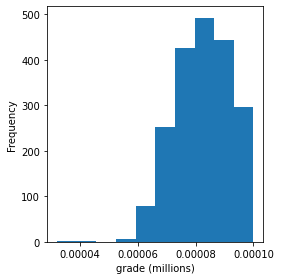

In [46]:
ax = (gdata['grade'] / 1_000_000).plot.hist(figsize=(4, 4))
ax.set_xlabel('grade (millions)')

plt.tight_layout()
plt.show()

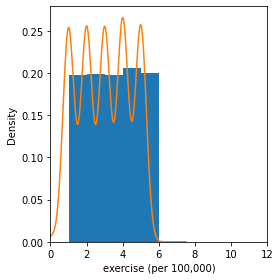

In [49]:
ax = gdata['exercise'] .plot.hist(density=True, xlim=[0, 12], 
                                    bins=range(1,12), figsize=(4, 4))
gdata['exercise'] .plot.density(ax=ax)
ax.set_xlabel('exercise (per 100,000)')

plt.tight_layout()
plt.show()

# New Section

Dataset 2:Smallgrades.csv

In [52]:
gdata1=pd.read_csv("/content/drive/MyDrive/datasets.zip (Unzipped Files)/datasets/smallgradesh.csv")

In [53]:
gdata1.head()

,Name,Grade
0,Marcia,82.4
1,Kadeem,78.2
2,Nash,79.3
3,Noelani,83.2
4,Noelani,87.4


In [54]:
binnedPopulation = pd.cut(gdata1['Grade'], 10)
print(binnedPopulation.value_counts())

(79.6, 86.4]      496
(86.4, 93.2]      436
(72.8, 79.6]      431
(93.2, 100.0]     296
(66.0, 72.8]      250
(59.2, 66.0]       81
(52.4, 59.2]        8
(38.8, 45.6]        1
(31.932, 38.8]      1
(45.6, 52.4]        0
Name: Grade, dtype: int64


In [55]:
binnedPopulation.name = 'binnedPopulation'
df = pd.concat([gdata1, binnedPopulation], axis=1)
df = df.sort_values(by='Grade')

groups = []
for group, subset in df.groupby(by='binnedPopulation'):
    groups.append({
        'BinRange': group,
        'Count': len(subset),
        'gdata1': ','.join(subset.Name)
    })
print(pd.DataFrame(groups))

         BinRange  Count                                             gdata1
0  (31.932, 38.8]      1                                              Alika
1    (38.8, 45.6]      1                                             Keegan
2    (45.6, 52.4]      0                                                   
3    (52.4, 59.2]      8     Levi,Gail,Jenna,Lacey,Isaiah,Abbot,Linda,Willa
4    (59.2, 66.0]     81  Ciaran,Selma,Xanthus,Fitzgerald,Steven,Chester...
5    (66.0, 72.8]    250  Cara,Amethyst,Preston,Stella,Irma,Keegan,Hardi...
6    (72.8, 79.6]    431  Leila,Curran,Morgan,Penelope,Morgan,Mara,Tasha...
7    (79.6, 86.4]    496  Leonard,Larissa,Carol,Hannah,Neve,Tanek,Buffy,...
8    (86.4, 93.2]    436  Lee,Samuel,Vivian,John,Shad,Wesley,Lewis,Karly...
9   (93.2, 100.0]    296  Armando,Fritz,Bethany,Doris,Eric,Darius,Gannon...


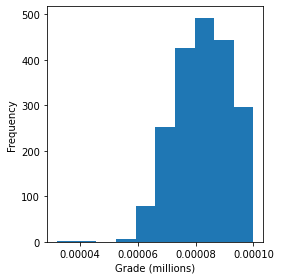

In [56]:
ax = (gdata1['Grade'] / 1_000_000).plot.hist(figsize=(4, 4))
ax.set_xlabel('Grade (millions)')

plt.tight_layout()
plt.show()

/usr/local/lib/python3.7/dist-packages/numpy/lib/histograms.py:905: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


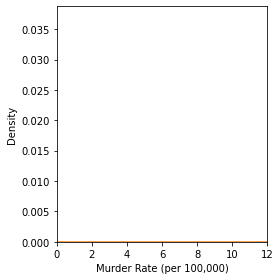

In [57]:
ax = gdata1['Grade'].plot.hist(density=True, xlim=[0, 12], 
                                    bins=range(1,12), figsize=(4, 4))
gdata1['Grade'].plot.density(ax=ax)
ax.set_xlabel('Murder Rate (per 100,000)')

plt.tight_layout()
plt.show()


dataset 3:Axisdata.csv

In [ ]:
gdata2=pd.read_csv("/content/drive/MyDrive/datasets.zip (Unzipped Files)/datasets/axisdata.csv")

In [ ]:
gdata2.head()

,Fname,Lname,Gender,Hours Worked,SalesTraining,Years Experience,Cars Sold
0,Jada,Walters,F,39,N,3,2
1,Nicole,Henderson,F,46,N,3,6
2,Tanya,Moore,F,42,Y,4,6
3,Ronelle,Jackson,F,38,Y,5,3
4,Brad,Sears,M,33,N,4,2


In [ ]:
binnedPopulation = pd.cut(gdata2['Years Experience'], 10)
print(binnedPopulation.value_counts())

(2.6, 3.0]      212
(1.8, 2.2]      207
(4.6, 5.0]      202
(3.8, 4.2]      195
(0.996, 1.4]    183
(4.2, 4.6]        0
(3.4, 3.8]        0
(3.0, 3.4]        0
(2.2, 2.6]        0
(1.4, 1.8]        0
Name: Years Experience, dtype: int64


In [ ]:
binnedPopulation.name = 'binnedPopulation'
df = pd.concat([gdata1, binnedPopulation], axis=1)
df = df.sort_values(by='Years Experience')

groups = []
for group, subset in df.groupby(by='binnedPopulation'):
    groups.append({
        'BinRange': group,
        'Count': len(subset),
        'gdata2': ','.join(subset.Fname)
    })
print(pd.DataFrame(groups))

       BinRange  Count                                             gdata2
0  (0.996, 1.4]    183  Mike,Sam,Roger,John,Tanya,Adam,Tom,Adam,Martin...
1    (1.4, 1.8]      0                                                   
2    (1.8, 2.2]    207  Brad,Roger,Harold,Nicole,Francine,Karen,Nicole...
3    (2.2, 2.6]      0                                                   
4    (2.6, 3.0]    212  Jackie,Larry,Brad,Mary,Onika,Adam,Nicole,Mary,...
5    (3.0, 3.4]      0                                                   
6    (3.4, 3.8]      0                                                   
7    (3.8, 4.2]    195  Oliver,Samantha,Frank,Veronica,Sam,Walter,Pete...
8    (4.2, 4.6]      0                                                   
9    (4.6, 5.0]    202  Carla,Betty,Paula,Adam,Sam,Onika,Martin,Victor...


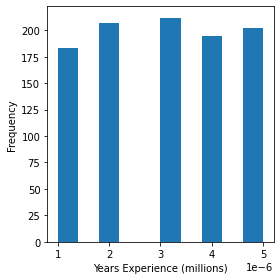

In [ ]:
ax = (gdata2['Years Experience'] / 1_000_000).plot.hist(figsize=(4, 4))
ax.set_xlabel('Years Experience (millions)')

plt.tight_layout()
plt.show()

Density curve

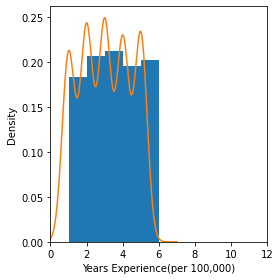

In [40]:
ax = gdata2['Years Experience'].plot.hist(density=True, xlim=[0, 12], 
                                    bins=range(1,12), figsize=(4, 4))
gdata2['Years Experience'].plot.density(ax=ax)
ax.set_xlabel('Years Experience(per 100,000)')

plt.tight_layout()
plt.show()

dataset 4:algebradata.csv

In [ ]:
gdata4=pd.read_csv("/content/drive/MyDrive/datasets.zip (Unzipped Files)/datasets/algebradata.csv")

In [ ]:
gdata4.head()

,Fname,Lname,Gender,Grade,Hours of Study
0,Mary,Ettienne,F,B,16
1,Charles,Looner,M,F,8
2,Betty,Franklin,F,A,24
3,Roger,Withers,M,C,5
4,John,Mulgrew,M,A,5


In [ ]:
binnedPopulation = pd.cut(gdata4['Hours of Study'], 10)
print(binnedPopulation.value_counts())

(-0.03, 3.0]    127
(9.0, 12.0]     107
(27.0, 30.0]    100
(18.0, 21.0]    100
(24.0, 27.0]     97
(15.0, 18.0]     96
(3.0, 6.0]       96
(21.0, 24.0]     93
(12.0, 15.0]     93
(6.0, 9.0]       90
Name: Hours of Study, dtype: int64


In [ ]:
binnedPopulation.name = 'binnedPopulation'
df = pd.concat([gdata4, binnedPopulation], axis=1)
df = df.sort_values(by='Hours of Study')

groups = []
for group, subset in df.groupby(by='binnedPopulation'):
    groups.append({
        'BinRange': group,
        'Count': len(subset),
        'gdata4': ','.join(subset.Fname)
    })
print(pd.DataFrame(groups))

       BinRange  Count                                             gdata4
0  (-0.03, 3.0]    127  india,John,Peter,Carla,Veronica,Frank,Mary,Oli...
1    (3.0, 6.0]     96  Betty,Nicole,Nicole,Onika,Jackie,Denise,Mike,P...
2    (6.0, 9.0]     90  Jada,August,Aaron,Betty,Denise,Francine,Jada,S...
3   (9.0, 12.0]    107  Victor,John,Harold,Veronica,Jack,John,David,On...
4  (12.0, 15.0]     93  Frank,Betty,Brad,Lisa,Karen,india,Jack,Denise,...
5  (15.0, 18.0]     96  Harold,Tanya,Frank,David,Peter,Denise,Nicole,J...
6  (18.0, 21.0]    100  Samantha,Ronelle,John,Charles,Victoria,Mike,Ni...
7  (21.0, 24.0]     93  Mary,Aaron,Mike,Victor,David,Oliver,Mary,Roger...
8  (24.0, 27.0]     97  Tanya,August,Nicole,Karen,Onika,Carla,Paula,On...
9  (27.0, 30.0]    100  Sam,Martin,Carla,John,August,Larry,David,Karen...


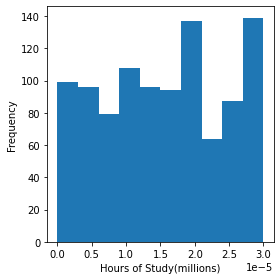

In [ ]:
ax = (gdata4['Hours of Study'] / 1_000_000).plot.hist(figsize=(4, 4))
ax.set_xlabel('Hours of Study(millions)')

plt.tight_layout()
plt.show()

Density curve

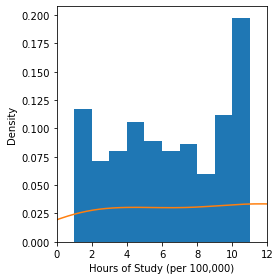

In [39]:
ax = gdata4['Hours of Study'].plot.hist(density=True, xlim=[0, 12], 
                                    bins=range(1,12), figsize=(4, 4))
gdata4['Hours of Study'].plot.density(ax=ax)
ax.set_xlabel('Hours of Study (per 100,000)')

plt.tight_layout()
plt.show()

dataset 5:fdicdata.csv

In [ ]:
gdata5=pd.read_csv("/content/drive/MyDrive/datasets.zip (Unzipped Files)/datasets/fdicdata.csv")

In [ ]:
gdata5.head()

,STNAME,ACTIVE,ADDRESS,ASSET,CITY,NAME,ROA,ROE,WEBADDR,ZIP,FLDOFF,REGION
0,Connecticut,0,22 Main Street,"48,570",Southington,The Southington Bank and Trust Company,NaN,NaN,,6489,Hartford,New York
1,Connecticut,0,81 West Main Street,"624,655",Waterbury,Colonial Bank of Waterbury,NaN,NaN,,6720,Hartford,New York
2,Maine,0,One City Center,"1,699,404",Portland,Fleet Bank of Maine,NaN,NaN,,4104,Concord,New York
3,Maine,0,66 Main Street,"539,169",Ellsworth,Union Trust Company,NaN,NaN,,4605,Concord,New York
4,Maine,0,8 Washington Street,"55,692",Sanford,Northeast Bank of Sanford,NaN,NaN,,4073,Concord,New York


In [ ]:
binnedPopulation = pd.cut(gdata5['ZIP'], 10)
print(binnedPopulation.value_counts())

(70114.3, 80043.2]    4420
(60185.4, 70114.3]    4070
(30398.7, 40327.6]    3614
(50256.5, 60185.4]    3430
(40327.6, 50256.5]    2763
(20469.8, 30398.7]    2331
(512.711, 10540.9]    2031
(89972.1, 99901.0]    1825
(10540.9, 20469.8]    1632
(80043.2, 89972.1]    1482
Name: ZIP, dtype: int64


In [ ]:
binnedPopulation.name = 'binnedPopulation'
df = pd.concat([gdata5, binnedPopulation], axis=1)
df = df.sort_values(by='ZIP')

groups = []
for group, subset in df.groupby(by='binnedPopulation'):
    groups.append({
        'BinRange': group,
        'Count': len(subset),
        'gdata5': ','.join(subset.STNAME)
    })
print(pd.DataFrame(groups))

             BinRange  Count                                             gdata5
0  (512.711, 10540.9]   2031  Puerto Rico,Puerto Rico,Puerto Rico,Puerto Ric...
1  (10540.9, 20469.8]   1632  New York,New York,New York,New York,New York,N...
2  (20469.8, 30398.7]   2331  Maryland,Maryland,Maryland,Maryland,Maryland,M...
3  (30398.7, 40327.6]   3614  Georgia,Georgia,Georgia,Georgia,Georgia,Georgi...
4  (40327.6, 50256.5]   2763  Kentucky,Kentucky,Kentucky,Kentucky,Kentucky,K...
5  (50256.5, 60185.4]   3430  Iowa,Iowa,Iowa,Iowa,Iowa,Iowa,Iowa,Iowa,Iowa,I...
6  (60185.4, 70114.3]   4070  Illinois,Illinois,Illinois,Illinois,Illinois,I...
7  (70114.3, 80043.2]   4420  Louisiana,Louisiana,Louisiana,Louisiana,Louisi...
8  (80043.2, 89972.1]   1482  Colorado,Colorado,Colorado,Colorado,Colorado,C...
9  (89972.1, 99901.0]   1825  California,California,California,California,Ca...


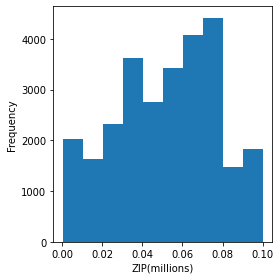

In [ ]:
ax = (gdata5['ZIP'] / 1_000_000).plot.hist(figsize=(4, 4))
ax.set_xlabel('ZIP(millions)')

plt.tight_layout()
plt.show()

Density curve

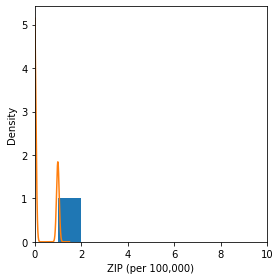

In [59]:
ax = gdata5['ACTIVE'].plot.hist(density=True, xlim=[0, 10], 
                                    bins=range(1,10), figsize=(4, 4))
gdata5['ACTIVE'].plot.density(ax=ax)
ax.set_xlabel('ZIP (per 100,000)')

plt.tight_layout()
plt.show()